In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
exp_1 = pd.read_excel("EXP-00001-Master.xlsx")

In [12]:
exp_2 = pd.read_excel('EXP-00002-Master.xlsx')

In [13]:
exp_3 = pd.read_excel('EXP-00003-Master.xlsx')

In [167]:
exp_4 = pd.read_excel('EXP-00004-Master.xlsx')
exp_5 = pd.read_excel('EXP-00004-Master.xlsx')

In [169]:

exp_1.drop(index=0, inplace=True)
exp_2.drop(index=0, inplace=True)
exp_3.drop(index=0, inplace=True)
exp_4.drop(index = 0, inplace = True)
exp_5.drop(index = 0, inplace= True)

exp_1.reset_index(drop=True, inplace=True)
exp_2.reset_index(drop=True, inplace=True)
exp_3.reset_index(drop=True, inplace=True)
exp_4.reset_index(drop=True, inplace=True)
exp_5.reset_index(drop=True, inplace=True)

['Id', 'Img Id', 'Da', 'Dp', 'FWidth', 'FLength', 'FThickness',
       'ELength', 'EThickness', 'EWidth', 'Volume', 'Area', 'Perimeter',
       'CHull  Area', 'CHull Perimeter', 'Sphericity', 'L/T Ratio',
       'T/L Aspect Ratio', 'Compactness', 'Roundness', 'Ellipse Ratio',
       'Circularity', 'Solidity', 'Concavity', 'Convexity', 'Extent', 'hash',
       'Surface Area', 'Filter0', 'Filter1', 'Filter2', 'Filter3', 'Filter4',
       'Filter5', 'Filter6', 'L/W Ratio', 'W/L Ratio', 'W/T Ratio',
       'T/W Ratio', 'CHull Surface Area', 'Sieve', 'Ellipticity',
       'Fiber Length', 'Fiber Width'],

In [182]:
# exp_1.groupby(['Id'])['Id'].count()
# exp_1[exp_1['Id'] == 1]
# #Dropping Id column since it's not relevant

# exp_1.groupby(['Filter0']).count()
# exp_2.groupby(['Filter0']).count()
# exp_3.groupby(['Filter0']).count()

# exp_1.groupby(['Filter1']).count()
# exp_2.groupby(['Filter1']).count()
# exp_3.groupby(['Filter1']).count()

# exp_1.groupby(['Filter2']).count()
# exp_2.groupby(['Filter2']).count()
# exp_3.groupby(['Filter2']).count()

# exp_1.groupby(['Filter3']).count()
# exp_2.groupby(['Filter3']).count()
# exp_3.groupby(['Filter3']).count()


# exp_1.groupby(['Filter4']).count()
# exp_2.groupby(['Filter4']).count()
# exp_3.groupby(['Filter4']).count()

# exp_1.groupby(['Filter5']).count()
# exp_2.groupby(['Filter5']).count()
# exp_3.groupby(['Filter5']).count()

# exp_1.groupby(['Filter6']).count()
# exp_2.groupby(['Filter6']).count()
# exp_3.groupby(['Filter6']).count()

#All filters contain reject for all filter columns, they are getting dropped

# exp_1.groupby(['hash']).count()
# exp_2.groupby(['hash']).count()
# exp_3.groupby(['hash']).count()
# Dropping hash, all values are 0

#Img Id doesn't seem to provide good values

exp_5.columns

Index(['Id', 'Img Id', 'Da', 'Dp', 'FWidth', 'FLength', 'FThickness',
       'ELength', 'EThickness', 'EWidth', 'Volume', 'Area', 'Perimeter',
       'CHull  Area', 'CHull Perimeter', 'Sphericity', 'L/T Ratio',
       'T/L Aspect Ratio', 'Compactness', 'Roundness', 'Ellipse Ratio',
       'Circularity', 'Solidity', 'Concavity', 'Convexity', 'Extent', 'hash',
       'Transparency', 'Curvature', 'Surface Area', 'Filter0', 'Filter1',
       'Filter2', 'Filter3', 'Filter4', 'Filter5', 'Filter6', 'L/W Ratio',
       'W/L Ratio', 'W/T Ratio', 'T/W Ratio', 'CHull Surface Area', 'Sieve',
       'Angularity', 'Ellipticity', 'Fiber Length', 'Fiber Width'],
      dtype='object')

In [183]:
not_included = ['Id', 'Filter0','Filter1', 'Filter2','Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash', 'Img Id', 'Curvature', 'Transparency', 'Angularity']
filtered = [x for x in exp_1.columns if x not in not_included]



exp_1_filtered = exp_1[filtered]
exp_2_filtered = exp_2[filtered]
exp_3_filtered = exp_3[filtered]
exp_4_filtered = exp_4[filtered]
exp_5_filtered = exp_5[filtered]

exp_1_filtered['Production Stage'] = 0
exp_2_filtered['Production Stage'] = 1
exp_3_filtered['Production Stage'] = 2
exp_4_filtered['Production Stage'] = 3
exp_5_filtered['Production Stage'] = 4

/var/folders/hx/pqx1jktn7hs7y0_68_bzk__m0000gn/T/ipykernel_4503/4217849102.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_1_filtered['Production Stage'] = 0
/var/folders/hx/pqx1jktn7hs7y0_68_bzk__m0000gn/T/ipykernel_4503/4217849102.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_2_filtered['Production Stage'] = 1
/var/folders/hx/pqx1jktn7hs7y0_68_bzk__m0000gn/T/ipykernel_4503/4217849102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [184]:
r1, c1 = exp_1_filtered.shape
r2, c2 = exp_2_filtered.shape
r3, c3  = exp_3_filtered.shape
data = exp_1_filtered.merge(exp_2_filtered, how= 'outer')
data
data = data.merge(exp_3_filtered, how = 'outer')
data = data.merge(exp_4_filtered, how = 'outer')
data = data.merge(exp_5_filtered, how='outer')

/Users/rodrigo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/Users/rodrigo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/Users/rodrigo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/Users/rodrigo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, 

<AxesSubplot:>

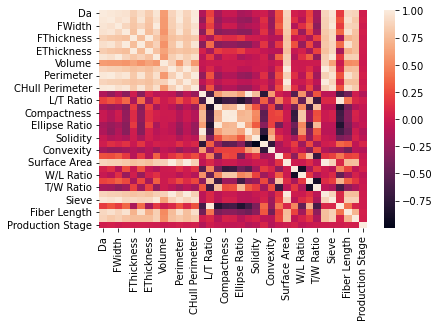

In [185]:
import seaborn as sns

for x in data.columns: 
    data[x] = pd.to_numeric(data[x])

sns.heatmap(data.corr())

In [186]:
data.corr()

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,...,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Ellipticity,Fiber Length,Fiber Width,Production Stage
Da,1.000000,0.982898,0.967207,0.945586,0.852547,0.934254,0.842409,0.966522,0.597962,0.875156,...,0.035428,-0.021059,0.215894,-0.174863,0.875192,0.974939,0.184808,0.891587,0.868710,0.025767
Dp,0.982898,1.000000,0.944433,0.970787,0.819140,0.962580,0.803724,0.937343,0.581310,0.852148,...,0.124976,-0.100514,0.243547,-0.198281,0.858618,0.947737,0.274456,0.943902,0.818192,0.039206
FWidth,0.967207,0.944433,1.000000,0.890041,0.797968,0.874673,0.786478,0.996348,0.580235,0.848474,...,-0.110032,0.119450,0.332034,-0.282260,0.850306,0.981408,0.183823,0.868403,0.852628,0.014032
FLength,0.945586,0.970787,0.890041,1.000000,0.774509,0.995199,0.759578,0.880384,0.556072,0.814325,...,0.253975,-0.231583,0.234607,-0.199338,0.819598,0.893965,0.356826,0.948140,0.781740,0.034955
FThickness,0.852547,0.819140,0.797968,0.774509,1.000000,0.762096,0.996128,0.797033,0.631661,0.780418,...,-0.017227,0.030172,-0.161280,0.197569,0.784122,0.898808,-0.156156,0.704199,0.763184,0.020396
ELength,0.934254,0.962580,0.874673,0.995199,0.762096,1.000000,0.746812,0.863972,0.547794,0.803225,...,0.272422,-0.247885,0.231669,-0.197177,0.809061,0.878836,0.379252,0.944515,0.764734,0.030888
EThickness,0.842409,0.803724,0.786478,0.759578,0.996128,0.746812,1.000000,0.786804,0.626743,0.773108,...,-0.025919,0.039713,-0.172554,0.209184,0.775140,0.889219,-0.177467,0.684694,0.761102,0.016899
EWidth,0.966522,0.937343,0.996348,0.880384,0.797033,0.863972,0.786804,1.000000,0.576949,0.849402,...,-0.119894,0.131417,0.320677,-0.272776,0.849199,0.978455,0.165067,0.850920,0.854722,0.010626
Volume,0.597962,0.581310,0.580235,0.556072,0.631661,0.547794,0.626743,0.576949,1.000000,0.860947,...,0.004763,-0.003171,0.004169,0.006619,0.864976,0.623155,-0.000016,0.509695,0.536510,-0.001061
Area,0.875156,0.852148,0.848474,0.814325,0.780418,0.803225,0.773108,0.849402,0.860947,1.000000,...,0.011577,-0.002552,0.103447,-0.074493,0.997757,0.865615,0.079232,0.756102,0.770382,0.010538


In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[filtered],
    data['Production Stage'],
    test_size=0.1,
    stratify= data['Production Stage'],
    random_state=44)

y_train.groupby(y_train).count()
y_test.groupby(y_test).count()



Production Stage
0    4857
1    4969
2    1482
3    3668
4    3668
Name: Production Stage, dtype: int64

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.model_selection import GridSearchCV

In [227]:
model = KNeighborsClassifier(n_neighbors=5, weights= 'distance')
scaled_data = scale(data[filtered])
model.fit(data[filtered], data["Production Stage"])
labels = data['Production Stage']

random = data.sample(frac = 1)

one_hundred = random[:1000]

predictions = model.predict(one_hundred[filtered])

total = 0
correct = 0

In [233]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('Accuracy score:',accuracy_score(one_hundred['Production Stage'], predictions))
print(precision_score(one_hundred['Production Stage'], predictions, average='macro'))


Accuracy score: 0.811
0.7940435280641467
